## Final Project Submission

Please fill out:
* Student name: Tara Mullin
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger 
* Blog post URL:


## Import Python Libraries needed for project

In [35]:
import pandas as pd #data processing
from pandas.tools.plotting import scatter_matrix #data processing, scatter matrix
import numpy as np #linear algebra
import statsmodels as sm #python module that provides classes and functions for the estimation of many different stats models, conducting statistical test, and statistical data exploration
from statsmodels.api import formula
%matplotlib inline
import matplotlib.pyplot as plt #plotting
import seaborn as sns #data visualization

## Import, read and analyze the dataset (df)

In [36]:
df = pd.read_csv('kc_house_data.csv')

## Getting Started:

* **Goal** : Predict the housing prices based on features in the dataset
* Clean the data
    * examine datatypes
    * find missing values (null values)
    * look for filler/placeholder data
    * columns we don't need --> extra indices
    * drop sparse columns


In [37]:
df.info

<bound method DataFrame.info of                id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
2      5631500400   2/25/2015   180000.0         2       1.00          770   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
7      2008000270   1/15/2015   291850.0         3       1.50         1060   
8      2414600126   4/15/2015   229500.0         3       1.00         1780   
9      3793500160   3/12/2015   323000.0         3       2.50         1890   
10     1736800520    4/3/2015   662500.0         3       2.50         3560   
11     9212900260   5/27/2014   

In [38]:
df.shape #analyzing the number of rows and columns in the data set

(21597, 21)

In [39]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [40]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


* Looking at 5 point statistics with df_houseprices.describe( )

I'm noticing that max bedrooms is 33. Let's investigate more.

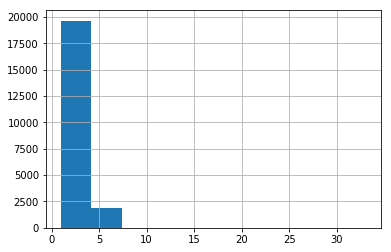

In [17]:
df['bedrooms'].hist()

In [18]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [19]:
df.loc[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [20]:
# Since there is only 1 entry with 33 bedrooms, and the other data for this house doesn't make
# sense for a house with 33 rooms (i.e. 1.75 bathrooms, 1,620 sqft, and $640,000), 33 may be a place holder
# I decided to drop the row
df['bedrooms'] = df['bedrooms'].drop(df['bedrooms'].idxmax(axis=0))

In [21]:
# checking that that row was dropped
df['bedrooms'].value_counts()

3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      196
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
Name: bedrooms, dtype: int64

In [22]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21596.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.371828,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.904114,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Moving on to missing values...

we see that there are some NaNs in some columns. Examine how many, how prevalent. Is the missing data random or does it have a pattern?

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


* RangeIndex = 21,597 
* Note missing values in **waterfront**,  **view**, & **yr_renovated**

In [42]:
# inspecting null values
total = df.isnull().sum().sort_values(ascending=False)
total

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [43]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

NameError: name 'percent' is not defined

In [72]:
# calculate percentage of null values in waterfront
df.waterfront.isna().sum() / kingcounty.shape[0]

0.11001527989998611

* 11% of our data is null in **waterfront**

In [73]:
# how to address this?
df.waterfront.unique()

array([nan,  0.,  1.])

Approaches to handling null values:
* replace null values with mean
* drop the column
* drop the rows

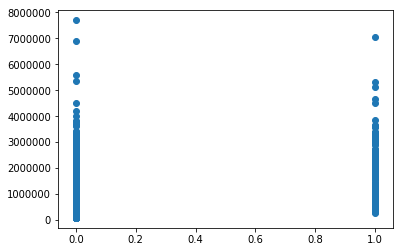

In [74]:
x = df['waterfront']
y = df['price']

plt.scatter(x, y)
plt.show()

In [75]:
#DateFrame that contains only entries that have data for waterfront
df_split_waterfront = df[df.waterfront == df.waterfront]
df_split_waterfront.shape

(19221, 21)

In [76]:
print(df_split_waterfront[df_split_waterfront.waterfront==0].shape, df_split_waterfront[df_split_waterfront.waterfront==1].shape)

(19075, 21) (146, 21)


In [77]:
df_split_waterfront[df_split_waterfront.waterfront==0].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.907500e+04,1.907500e+04,19074.000000,19075.000000,19075.000000,1.907500e+04,19075.000000,19075.0,19019.000000,19075.000000,19075.000000,19075.000000,19075.000000,15688.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000
mean,4.593352e+09,5.326420e+05,3.373283,2.112543,2073.524404,1.499112e+04,1.493997,0.0,0.203954,3.408965,7.652058,1785.875125,1971.106841,79.280087,98077.591140,47.560078,-122.213552,1982.052949,12729.486186
std,2.877189e+09,3.449592e+05,0.902010,0.764537,909.083746,4.077700e+04,0.539980,0.0,0.698385,0.649431,1.165675,824.965911,29.391929,389.881401,53.373727,0.138857,0.140740,680.982492,27593.553043
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124079e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.036500e+03,1.000000,0.0,0.000000,3.000000,7.000000,1190.000000,1952.000000,0.000000,98032.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.589000e+03,1.500000,0.0,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7600.000000
75%,7.334401e+09,6.386000e+05,4.000000,2.500000,2540.000000,1.058400e+04,2.000000,0.0,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2350.000000,10031.500000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [78]:
df_split_waterfront[df_split_waterfront.waterfront==1].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,145.000000,146.000000,146.000000,146.000000,146.000000,121.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.786207,3.541096,8.835616,2508.760274,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630
std,2.858045e+09,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.555105,0.743957,1.781233,1283.720489,27.118576,852.484732,60.599756,0.113744,0.123772,808.410448,23264.085993
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,5.000000,440.000000,1905.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000
25%,2.016369e+09,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,3.000000,8.000000,1565.000000,1941.250000,0.000000,98040.000000,47.452550,-122.376000,2075.000000,11991.500000
50%,3.692780e+09,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,3.000000,9.000000,2200.000000,1959.500000,0.000000,98075.000000,47.548150,-122.273500,2695.000000,16260.500000
75%,7.390450e+09,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,4.000000,10.000000,3220.000000,1984.750000,0.000000,98155.000000,47.607550,-122.210000,3140.000000,24537.500000
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


*cheapest house on the waterfront is almost more expensive than a quarter of the houses not on the waterfront.



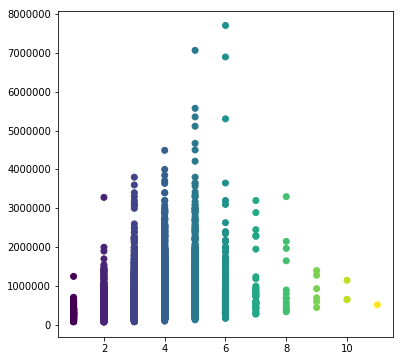

In [85]:
plt.figure(figsize = (6,6))
plt.scatter(df.bedrooms, df.price, c=df.bedrooms.values) 
#price on y axis, number of rooms on y
#color by number of bedrooms
plt.show()

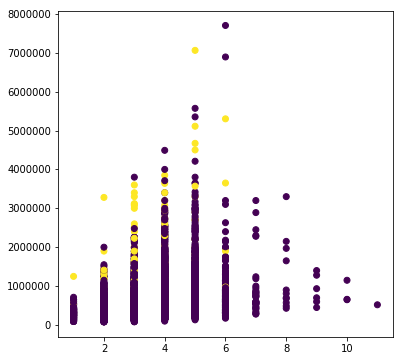

In [86]:
plt.figure(figsize = (6,6))
plt.scatter(df.bedrooms, df.price, c=df_split_waterfront) 
#price on y axis, number of rooms on y
#color by if on waterfront
plt.show()

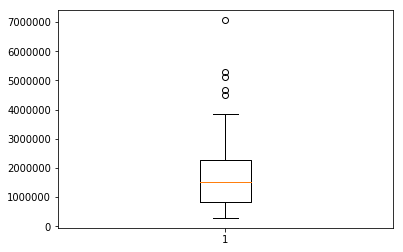

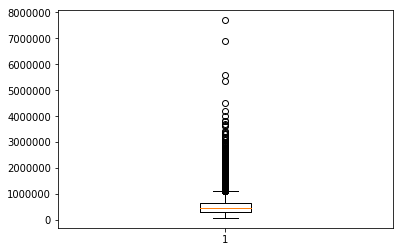

In [91]:
plt.boxplot(df_split_waterfront[df_split_waterfront.waterfront==1]['price'])
plt.show()
plt.boxplot(df_split_waterfront[df_split_waterfront.waterfront==0]['price'])
plt.show()

In [ ]:
# benefit of box plot: show outliers and where majority of your data lies
# splitting categories then look at correlation
# plot histograms of prices, square feet, bedrooms
# skewness and kurtosis, if skewed you can start normalizing it (log transformation --> but not with tons of zeros)


In [ ]:
#business stakeholders: how much/how many? which category? which group?
#goal: predict house price and understand what factors influence it.
#determine the factors/variable that affect salesprice of houses
#1) understand the problem. we will look at each variable and perform analysis about
#their meaning and importnace for this problem
#2) univariable study. focus on teh dependent variable ('SalePrice') to try to know a little bit more about it
#3) bivariate and multivariate study. analyze how the dependent variable and independent variables relate